In [1]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

## EJEMPLO DE REGRESIÓN LINEAL MÚLTIPLE:

This dataset provides a comprehensive record of Apple Inc.'s stock price changes over the past 44 years. It includes essential columns such as the date, opening price, highest price of the day, lowest price of the day, closing price, adjusted closing price, and trading volume.

https://www.kaggle.com/datasets/mayankanand2701/apple-stock-price-dataset

In [2]:
df = pd.read_csv("apple.csv")
print("Dimensiones del dataset :", df.shape)
df.head()

Dimensiones del dataset : (10954, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10954 non-null  object 
 1   Open       10954 non-null  float64
 2   High       10954 non-null  float64
 3   Low        10954 non-null  float64
 4   Close      10954 non-null  float64
 5   Adj Close  10954 non-null  float64
 6   Volume     10954 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 599.2+ KB


In [4]:
# Date to numeric value
df['Date'] = pd.to_datetime(df['Date'])

# Convert the datetime to a numeric format (e.g., Unix timestamp)
df['Date_numeric'] = df['Date'].map(pd.Timestamp.timestamp)

df.drop(['Date'], axis=1, inplace=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume,Date_numeric
0,0.128348,0.128906,0.128348,0.128348,0.099058,469033600,345427200.0
1,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,345686400.0
2,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,345772800.0
3,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,345859200.0
4,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,345945600.0


Text(0.5, 1.0, 'Correlation Matrix')

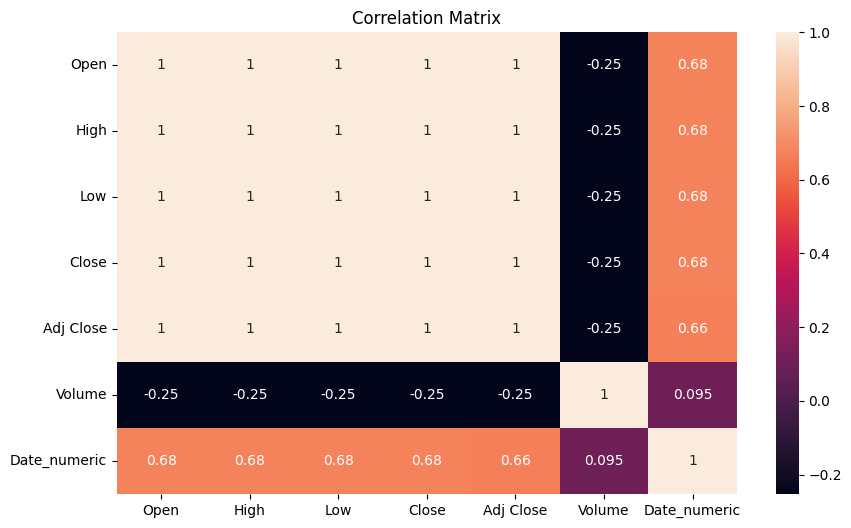

In [5]:
# y como parte de un análisis, revisaremos la correlación de las variables
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

From the previous correlation matrix we infer that open, high, low, close and adjustment close are strongly related so we need to remove some of them.

Date has a not so strong relation to the other variables but it is totally independent from volume, good sign.

In [6]:
df1 = df.drop(["Open", "Low", "Close", "Adj Close"], axis=1)
df1.head()

,High,Volume,Date_numeric
0,0.128906,469033600,345427200.0
1,0.122210,175884800,345686400.0
2,0.113281,105728000,345772800.0
3,0.116071,86441600,345859200.0
4,0.119420,73449600,345945600.0


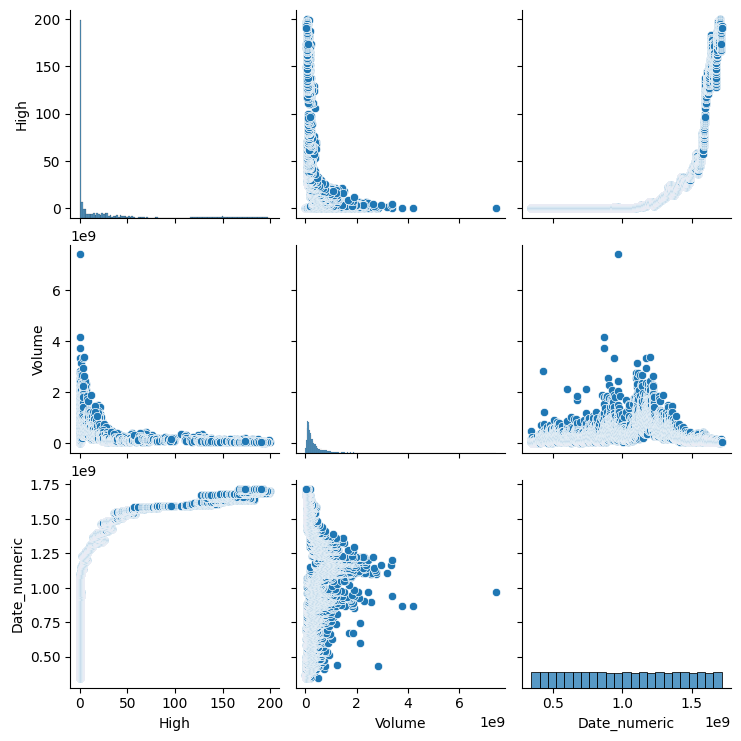

In [7]:
sns.pairplot(df1, kind="scatter")

In [8]:
# Preprocesando el conjunto de datos
df1.isna().sum() # revisando si hay nulos

High            0
Volume          0
Date_numeric    0
dtype: int64

In [9]:
# Eliminando casos imposibles con la lógica del dataset. Por ejemplo, peces con peso o longitudes que sean cero
df1[df1["Volume"] == 0]
# se debe mostrar una tabla con los eliminados, eliminamos empleando el index

,High,Volume,Date_numeric
165,0.112723,0,366249600.0


In [10]:
df1.drop([165])

,High,Volume,Date_numeric
0,0.128906,469033600,3.454272e+08
1,0.122210,175884800,3.456864e+08
2,0.113281,105728000,3.457728e+08
3,0.116071,86441600,3.458592e+08
4,0.119420,73449600,3.459456e+08
...,...,...,...
10949,191.919998,44361300,1.716163e+09
10950,192.729996,42309400,1.716250e+09
10951,192.820007,34648500,1.716336e+09
10952,191.000000,51005900,1.716422e+09


In [11]:
# X tendrá los datos de entrenamiento
X = df1[["Volume", "Date_numeric"]]
y = df1[["High"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (8763, 2)
Tamaño de X_test= (2191, 2)
Tamaño de y_train= (8763, 1)
Tamaño de y_test= (2191, 1)


In [12]:
def polynomial_plot(feature, label, quadratic_degree):
    # Crear un array de una dimensión para reducir el arreglo de dos dimensiones a una.
    x_coordinates = feature
    y_coordinates = np.squeeze(label)

    # polinomio de primer grado (recta)
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    # polinomio de segundo grado (curva parabólica)
    quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, quadratic_degree))

    # Generar valores para visualizar los datos
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    plt.scatter(x_coordinates,y_coordinates, color='blue')
    plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Modelo lineal')
    plt.plot(values, quadratic_func(values), color='red', label='Polinomio cuadrático')
    plt.xlabel('Datos de test de %s '%(feature.name))
    plt.ylabel('High price')
    plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
    plt.legend()
    plt.title("Función lineal para la característica %s" % (feature.name))
    plt.title("Comparacion de funciones lineales y cuadráticas para la característica %s" % (feature.name))
    plt.show()

In [13]:
poly_degree = 7

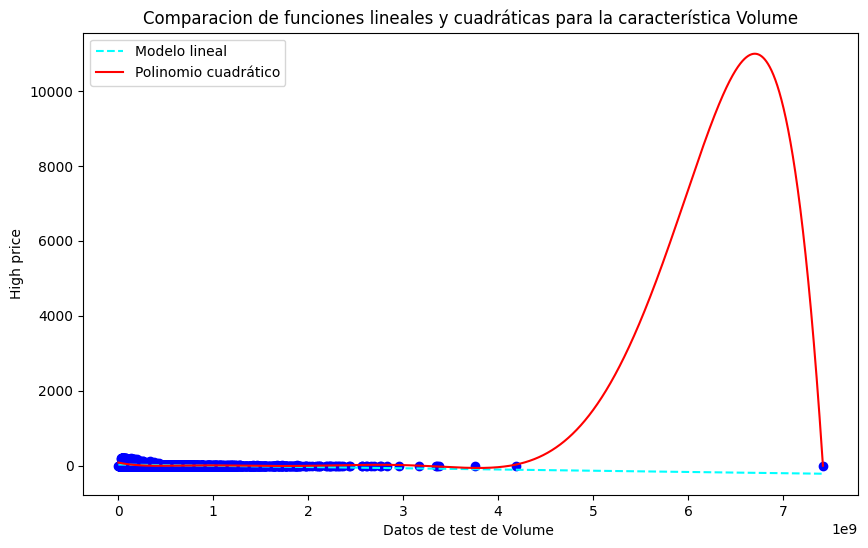

In [14]:
polynomial_plot(X_train.Volume, y_train, poly_degree) # comparando modelos para el Volume y High price

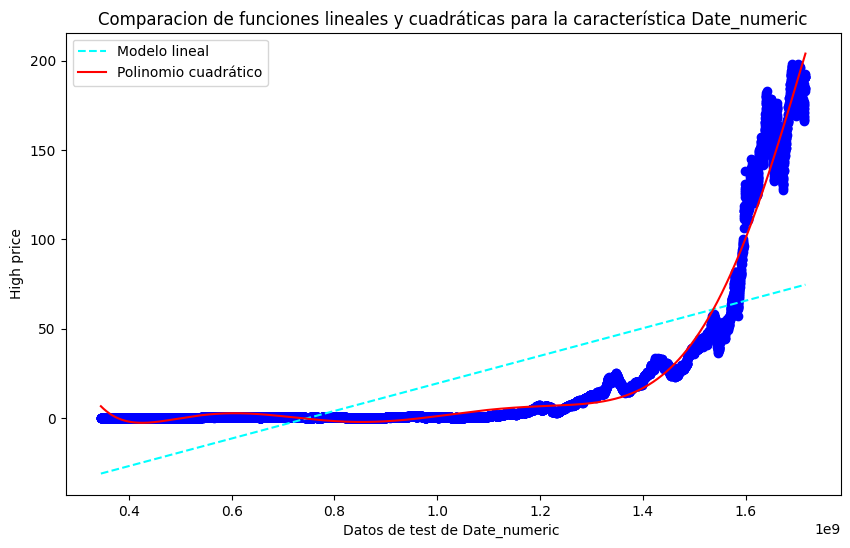

In [15]:
polynomial_plot(X_train.Date_numeric, y_train, poly_degree) # comparando modelos para el Date y High price

### Regresión POLINOMICA utilizando Sklearn

```
poly_degree
```



degree =  1 r2_score=  0.453503669323881
degree =  2 r2_score=  0.7961311812039124
degree =  3 r2_score=  0.87087594455718
degree =  4 r2_score=  0.9182921920384675
degree =  5 r2_score=  0.9453436842846155
degree =  6 r2_score=  0.959389492032151
degree =  7 r2_score=  0.965978686893207
degree =  8 r2_score=  0.9686222458452035
degree =  9 r2_score=  0.969359078759137
degree =  10 r2_score=  0.9693214855051028
degree =  11 r2_score=  0.9691117966163928
degree =  12 r2_score=  0.9690260163403362
degree =  13 r2_score=  0.9691839909244452
degree =  14 r2_score=  0.9696058909259221
degree =  15 r2_score=  0.970257649604213
degree =  16 r2_score=  0.9710780793375371
degree =  17 r2_score=  0.9719950037779299
degree =  18 r2_score=  0.9729347367935268
degree =  19 r2_score=  0.973827495836383
degree =  20 r2_score=  0.9746103077249932
degree =  21 r2_score=  0.9752283555788109
degree =  22 r2_score=  0.9756353560022595
degree =  23 r2_score=  0.9757933422745206
degree =  24 r2_score=  0.97

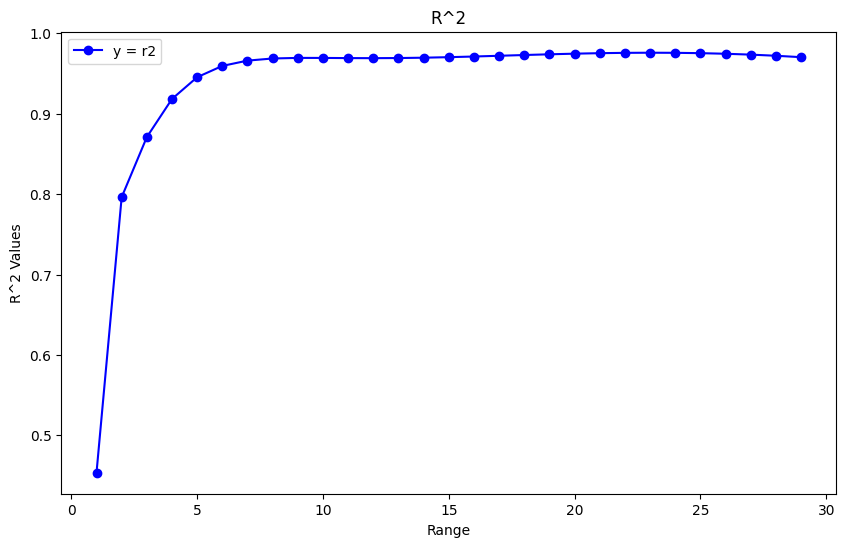

In [33]:
r_2_acc = []

def polynomial_regression(poly_degree):
  poly = PolynomialFeatures(degree = poly_degree)
  X_poly = poly.fit_transform(X_train)
  poly.fit(X_poly, y_train)

  lm = linear_model.LinearRegression()
  lm.fit(X_poly, y_train)

  predictions = lm.predict(poly.fit_transform(X_test))
  r_2 = metrics.r2_score(y_test, predictions)
  r_2_acc.append(r_2)

  print('degree = ', poly_degree, 'r2_score= ', r_2)

  return predictions

degree_range = range(1,30)

for i in degree_range:
  _ = polynomial_regression(i)

plt.figure(figsize=(10,6))
plt.plot(degree_range, r_2_acc, marker='o', linestyle='-', color='b', label='y = r2')

plt.xlabel('Range')
plt.ylabel('R^2 Values')
plt.title('R^2')
plt.legend()

plt.show()

### Entendiendo los resultados del entrenamiento.
Al terminar el entrenamiento, tenemos que el valor de la métrica de R cuadrado indica un buen ajuste.
Lo que podemos hacer es intentar predecir los datos de prueba y validar cómo le va al modelo en comparación con las etiquetas


In [17]:
predictions = polynomial_regression(9)

predictedWeight = pd.DataFrame(predictions, columns=['Predicted Hight Price']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

degree =  9 r2_score=  0.967742086766371


,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
High,0.335938,50.377499,0.330357,9.428571,11.435000,0.412946,81.495003,0.473214,0.582589,0.379464,...,0.133929,0.234375,0.462054,0.245536,43.272499,0.322857,147.360001,12.422500,0.386964,0.089844
Predicted Hight Price,0.046067,72.825773,0.625594,10.340299,10.369858,0.332503,84.098894,0.671649,0.547046,0.605294,...,0.696591,0.422199,0.576931,0.398186,53.235824,-0.210326,142.499491,8.320923,-0.025978,0.702144


Text(0.5, 1.0, 'Comparación del Hight price generado por el modelo y las etiquetas')

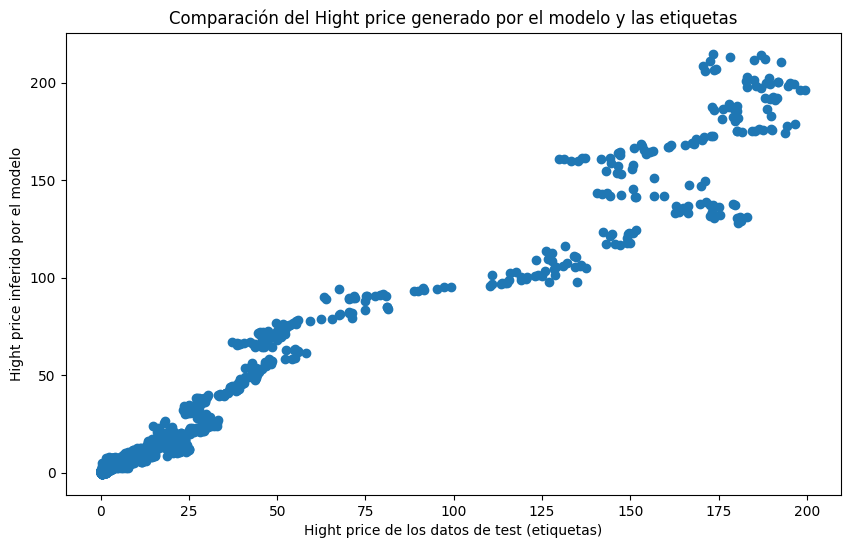

In [18]:
plt.scatter(y_test, predictions)
plt.xlabel('Hight price de los datos de test (etiquetas)')
plt.ylabel('Hight price inferido por el modelo')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Comparación del Hight price generado por el modelo y las etiquetas")

Text(0.5, 1.0, 'histograma de las diferencias')

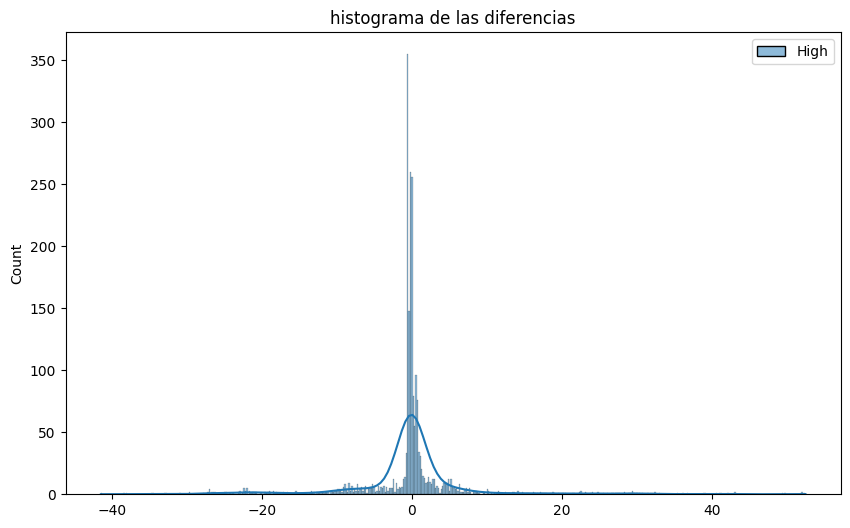

In [19]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

# Lineal multiple

In [34]:
# Fit the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict on the test set
predictions = lm.predict(X_test)

# Evaluate the model
print('r2_score= ', metrics.r2_score(y_test, predictions))


r2_score=  0.453503669323881


In [35]:
predictions = polynomial_regression(9)

predictedWeight = pd.DataFrame(predictions, columns=['Predicted Hight Price']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

degree =  9 r2_score=  0.969359078759137


,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
High,0.595982,0.355357,0.306920,1.585000,7.221429,33.974998,6.703571,0.434464,69.474998,4.157143,...,0.131696,5.663929,1.888929,12.445714,173.199997,0.095982,1.097098,134.740005,20.079643,40.747501
Predicted Hight Price,0.461694,0.382423,0.791596,0.891416,5.145009,41.652884,2.289497,0.388882,88.942144,3.208645,...,1.019361,2.147759,0.943244,7.150512,128.300381,1.020959,0.410332,103.830460,12.771025,47.829315


Text(0.5, 1.0, 'Comparación del Hight price generado por el modelo y las etiquetas')

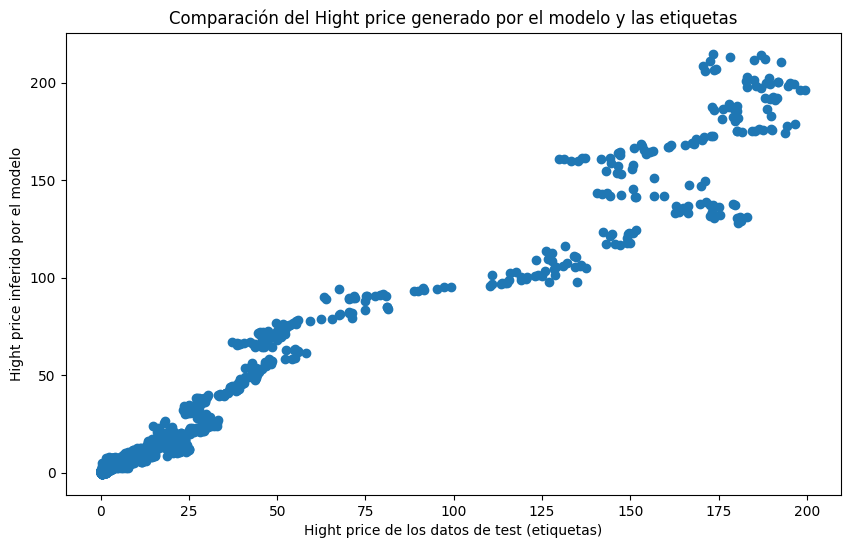

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Hight price de los datos de test (etiquetas)')
plt.ylabel('Hight price inferido por el modelo')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Comparación del Hight price generado por el modelo y las etiquetas")

Text(0.5, 1.0, 'histograma de las diferencias')

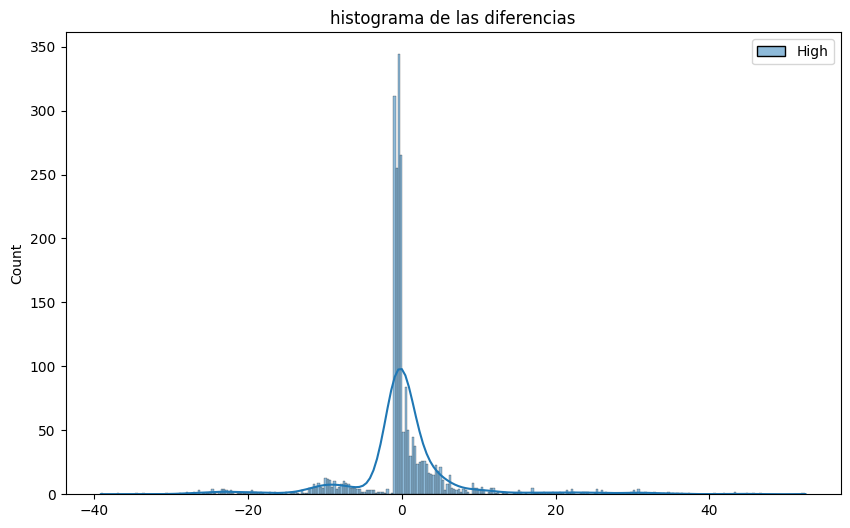

In [36]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

# Logaritmica

In [37]:
# Apply log transformation to the target variable
y_train_log = np.log(y_train)

# Fit the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train_log)

# Predict on the test set and apply the exponential function to reverse the log transformation
predictions_log = lm.predict(X_test)
predictions = np.exp(predictions_log)

# Evaluate the model
print('r2_score= ', metrics.r2_score(y_test, predictions))

r2_score=  0.6610354045499871


In [38]:
predictions = polynomial_regression(9)

predictedWeight = pd.DataFrame(predictions, columns=['Predicted Hight Price']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

degree =  9 r2_score=  0.969359078759137


,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
High,0.595982,0.355357,0.306920,1.585000,7.221429,33.974998,6.703571,0.434464,69.474998,4.157143,...,0.131696,5.663929,1.888929,12.445714,173.199997,0.095982,1.097098,134.740005,20.079643,40.747501
Predicted Hight Price,0.461694,0.382423,0.791596,0.891416,5.145009,41.652884,2.289497,0.388882,88.942144,3.208645,...,1.019361,2.147759,0.943244,7.150512,128.300381,1.020959,0.410332,103.830460,12.771025,47.829315


Text(0.5, 1.0, 'Comparación del Hight price generado por el modelo y las etiquetas')

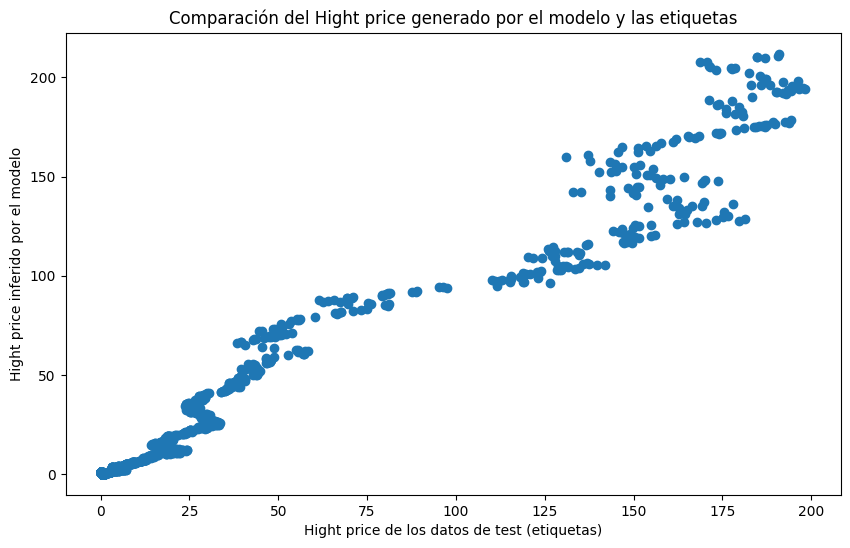

In [39]:
plt.scatter(y_test, predictions)
plt.xlabel('Hight price de los datos de test (etiquetas)')
plt.ylabel('Hight price inferido por el modelo')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Comparación del Hight price generado por el modelo y las etiquetas")

Text(0.5, 1.0, 'histograma de las diferencias')

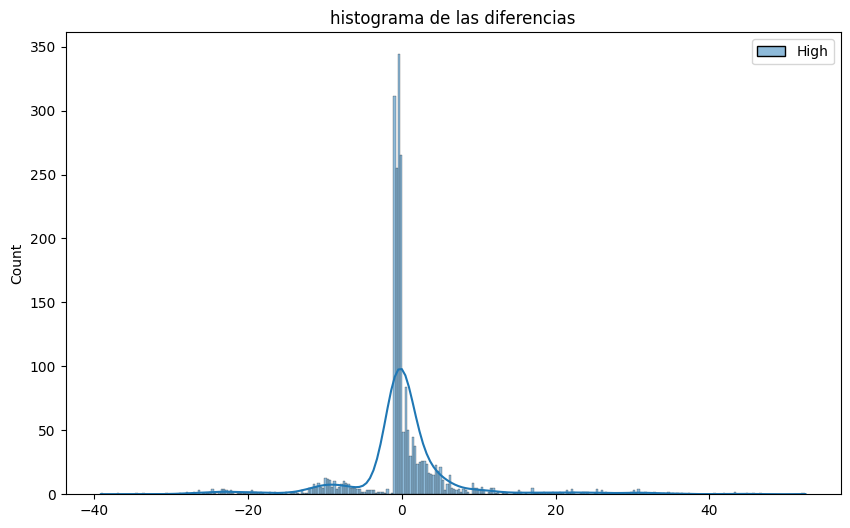

In [40]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

# Linear Simple
## Volume

In [20]:
# X tendrá los datos de entrenamiento
X = df1[["Volume"]]
y = df1[["High"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Fit the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict on the test set
predictions = lm.predict(X_test)

# Evaluate the model
print('\n\nr2_score= ', metrics.r2_score(y_test, predictions))

Tamaño de X_train= (8763, 1)
Tamaño de X_test= (2191, 1)
Tamaño de y_train= (8763, 1)
Tamaño de y_test= (2191, 1)


r2_score=  0.05380970329813417


### Entendiendo los resultados del entrenamiento.
Al terminar el entrenamiento, tenemos que el valor de la métrica de R cuadrado indica un buen ajuste.
Lo que podemos hacer es intentar predecir los datos de prueba y validar cómo le va al modelo en comparación con las etiquetas


In [21]:
predictedWeight = pd.DataFrame(predictions, columns=['Predicted Hight price']) # Create new dataframe of column'Predicted Hight price'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
High,192.820007,0.119420,0.376250,0.350446,0.060268,0.270089,0.265625,0.084821,0.084263,0.146205,...,13.705000,34.994999,0.368862,13.696429,0.361607,0.356027,0.378929,0.147879,0.310268,0.832589
Predicted Hight price,31.916910,24.494792,22.976732,27.348297,30.978591,27.137884,22.124271,31.821786,29.547785,8.545510,...,24.279746,30.705703,-45.483834,-8.412497,28.042852,11.077605,23.272275,10.640371,29.758584,13.190419


Text(0.5, 1.0, 'Comparación del Hight price generado por el modelo y las etiquetas')

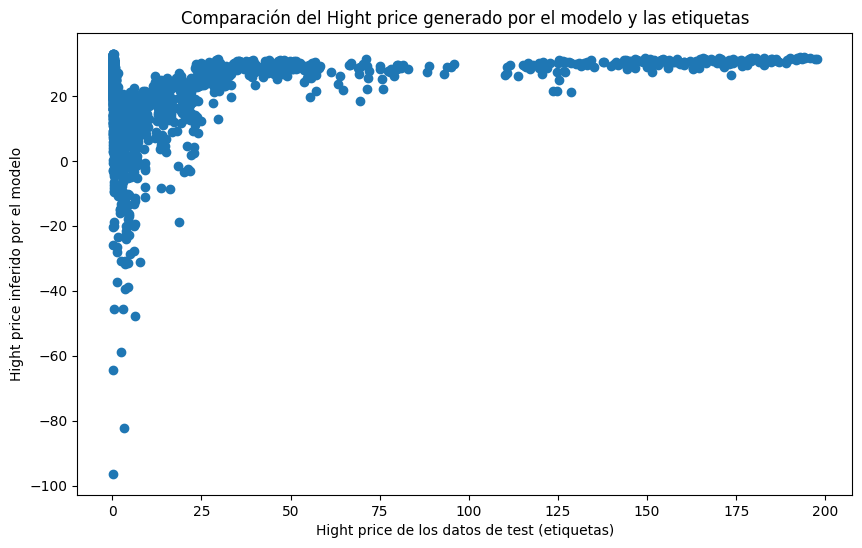

In [22]:
plt.scatter(y_test, predictions)
plt.xlabel('Hight price de los datos de test (etiquetas)')
plt.ylabel('Hight price inferido por el modelo')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Comparación del Hight price generado por el modelo y las etiquetas")

Text(0.5, 1.0, 'histograma de las diferencias')

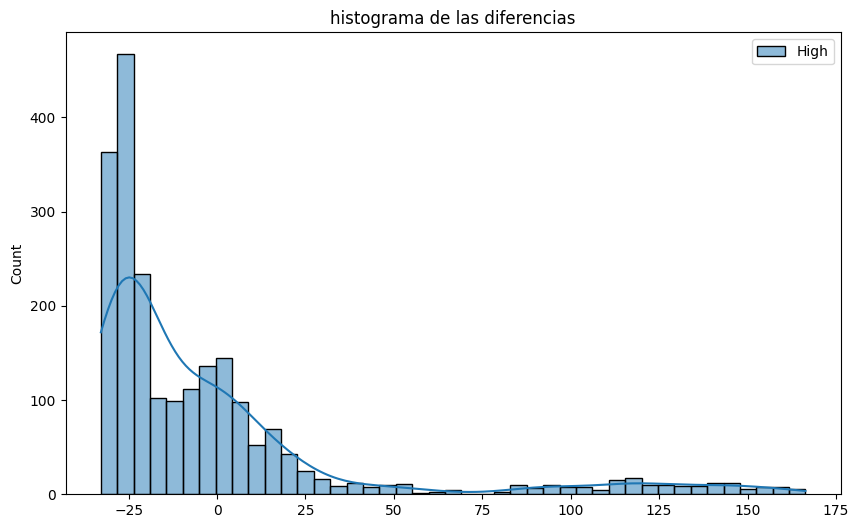

In [23]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
sns.histplot(y_test-predictions, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [24]:
# Fit the linear regression model
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

# Predict on the test set
predictions = lm.predict(X_test)

# Evaluate the model
print('r2_score= ', metrics.r2_score(y_test, predictions))

r2_score=  0.05380970329813417


In [25]:
predictedHight = pd.DataFrame(predictions, columns=['Predicted Hight price']) # Create new dataframe of column'Predicted Weight'
actualHight = pd.DataFrame(y_test)
actualHight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualHight,predictedHight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
High,192.820007,0.119420,0.376250,0.350446,0.060268,0.270089,0.265625,0.084821,0.084263,0.146205,...,13.705000,34.994999,0.368862,13.696429,0.361607,0.356027,0.378929,0.147879,0.310268,0.832589
Predicted Hight price,31.916910,24.494792,22.976732,27.348297,30.978591,27.137884,22.124271,31.821786,29.547785,8.545510,...,24.279746,30.705703,-45.483834,-8.412497,28.042852,11.077605,23.272275,10.640371,29.758584,13.190419


Text(0.5, 1.0, 'Comparación del Hight price generado por el modelo y las etiquetas')

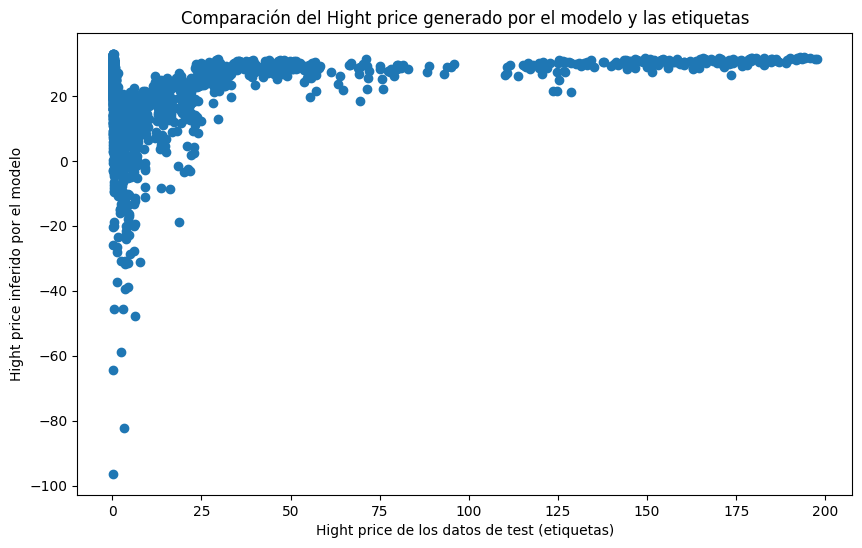

In [26]:
plt.scatter(y_test, predictions)
plt.xlabel('Hight price de los datos de test (etiquetas)')
plt.ylabel('Hight price inferido por el modelo')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Comparación del Hight price generado por el modelo y las etiquetas")

Text(0.5, 1.0, 'histograma de las diferencias')

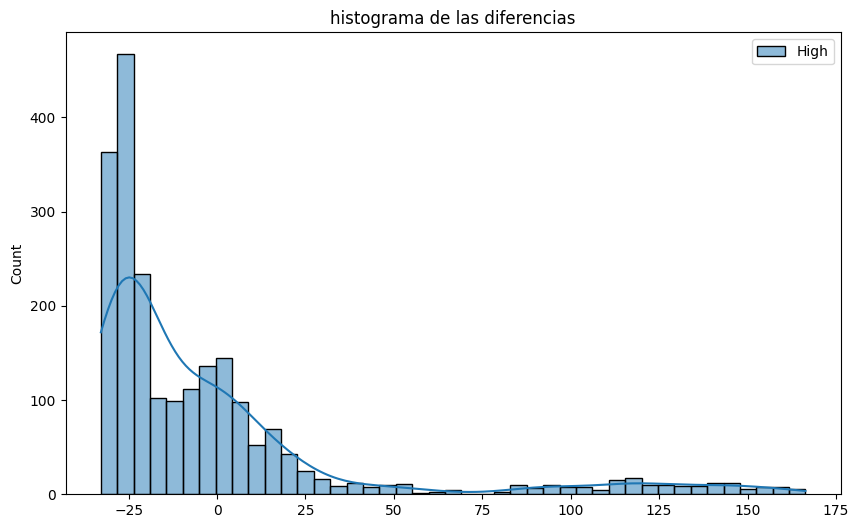

In [27]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

# Linear Simple
## Date

In [28]:
# X tendrá los datos de entrenamiento
X = df1[["Date_numeric"]]
y = df1[["High"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Fit the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict on the test set
predictions = lm.predict(X_test)

# Evaluate the model
print('\n\nr2_score= ', metrics.r2_score(y_test, predictions))

Tamaño de X_train= (8763, 1)
Tamaño de X_test= (2191, 1)
Tamaño de y_train= (8763, 1)
Tamaño de y_test= (2191, 1)


r2_score=  0.453503669323881


In [29]:
predictedWeight = pd.DataFrame(predictions, columns=['Predicted Hight price']) # Create new dataframe of column'Predicted Hight price'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
High,0.595982,0.355357,0.306920,1.585000,7.221429,33.974998,6.703571,0.434464,69.474998,4.157143,...,0.131696,5.663929,1.888929,12.445714,173.199997,0.095982,1.097098,134.740005,20.079643,40.747501
Predicted Hight price,14.615896,19.759995,2.580023,28.676433,39.525205,56.507327,34.308562,18.559705,64.164120,36.412366,...,-22.151222,33.919457,29.019373,41.833455,68.173879,-23.549361,16.983500,65.832655,46.212534,57.839517


Text(0.5, 1.0, 'Comparación del Hight price generado por el modelo y las etiquetas')

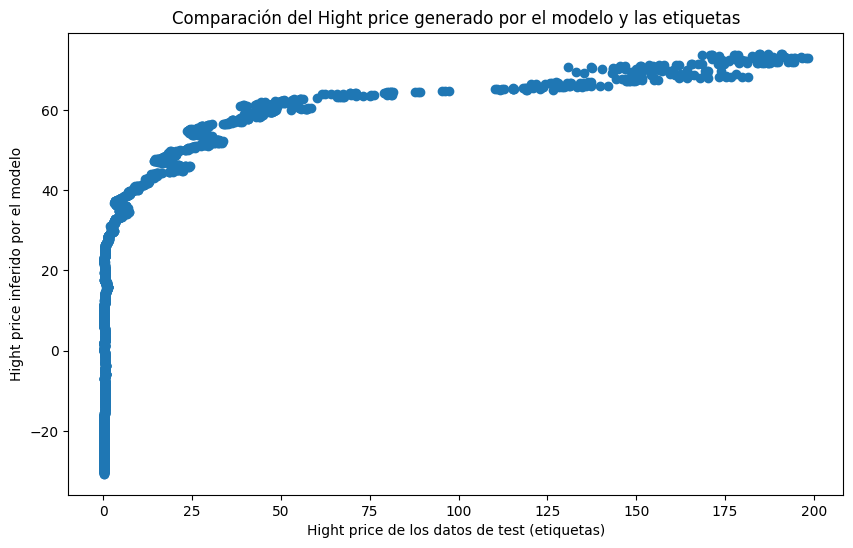

In [30]:
plt.scatter(y_test, predictions)
plt.xlabel('Hight price de los datos de test (etiquetas)')
plt.ylabel('Hight price inferido por el modelo')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Comparación del Hight price generado por el modelo y las etiquetas")

Text(0.5, 1.0, 'histograma de las diferencias')

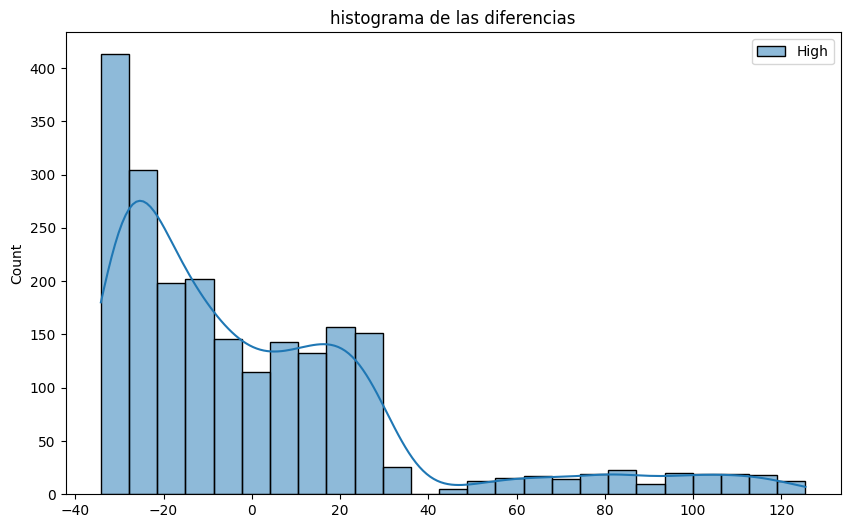

In [31]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
sns.histplot(y_test-predictions, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")